In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

In [40]:
# Load MPEA datasets
mpea_hardness = pd.read_csv("/home/jren/pal_project/mpea_clustering/Recommendations.csv").iloc[:,1:30]
recommendations_oct7 = pd.read_csv("/home/jren/pal_project/mpea_clustering/Recommendations_Oct7.csv").iloc[:,1:30]
recommendations1 = pd.read_csv("/home/jren/pal_project/mpea_clustering/Recommendations1.csv").iloc[:20,1:30]

mpea_hardness = pd.concat([mpea_hardness, recommendations_oct7], ignore_index=True)
mpea_hardness = pd.concat([mpea_hardness, recommendations1], ignore_index=True)

# Add column for Zr
mpea_hardness["Zr"] = 0.0

print(mpea_hardness)
X = np.array(mpea_hardness)

# Elements (colummn labels)
elems = list(mpea_hardness.columns)
print(elems)

     Ag     Al    B    C   Ca     Co     Cr     Cu     Fe   Ga  ...   Sc  \
0   0.0  0.000  0.0  0.0  0.0  0.000  0.000  0.000  0.340  0.0  ...  0.0   
1   0.0  0.342  0.0  0.0  0.0  0.000  0.000  0.000  0.315  0.0  ...  0.0   
2   0.0  0.350  0.0  0.0  0.0  0.000  0.000  0.000  0.000  0.0  ...  0.0   
3   0.0  0.000  0.0  0.0  0.0  0.343  0.000  0.000  0.000  0.0  ...  0.0   
4   0.0  0.000  0.0  0.0  0.0  0.340  0.000  0.000  0.000  0.0  ...  0.0   
..  ...    ...  ...  ...  ...    ...    ...    ...    ...  ...  ...  ...   
60  0.0  0.174  0.0  0.0  0.0  0.174  0.174  0.000  0.174  0.0  ...  0.0   
61  0.0  0.147  0.0  0.0  0.0  0.147  0.147  0.147  0.000  0.0  ...  0.0   
62  0.0  0.000  0.0  0.0  0.0  0.250  0.250  0.000  0.000  0.0  ...  0.0   
63  0.0  0.015  0.0  0.0  0.0  0.123  0.123  0.123  0.123  0.0  ...  0.0   
64  0.0  0.312  0.0  0.0  0.0  0.000  0.000  0.062  0.000  0.0  ...  0.0   

       Si   Sn     Ta     Ti      V    W      Y     Zn   Zr  
0   0.312  0.0  0.000  0.

In [41]:
def get_elem_counts(df, elems):
    """
    Get a list of element counts for the given DataFrame
    """
    elem_counts = [0] * len(elems)
    for i in range(len(df)):
        for j in range(len(elems)):
            if (df.loc[i, elems[j]] > 0.0):
                elem_counts[j] += 1
    return elem_counts

elem_counts = get_elem_counts(mpea_hardness, elems)
print(elem_counts)

[0, 44, 0, 2, 1, 34, 22, 13, 18, 0, 3, 7, 12, 8, 19, 13, 0, 13, 0, 0, 0, 19, 4, 9, 17, 16, 8, 4, 10, 0]


In [42]:
def elem_heatmap(elems, elem_counts, cbar_labels=None, save_path=None):
    """
    Plot a heatmap based on element count
    """

    # Plot heat map based on element counts
    fig, ax = plt.subplots(figsize=(14,3))

    # Create a custom colormap and norm that maps integers to colors
    cmap = plt.cm.inferno
    max_count = max(elem_counts)
    min_count = min(elem_counts)
    bounds = np.linspace(min_count, max_count, max_count - min_count + 1)
    norm = BoundaryNorm(bounds, cmap.N)

    ax.pcolormesh([elem_counts], cmap=cmap, shading='flat')
    ax.set_xticks(np.arange(0.5, len(elem_counts), 1))
    ax.set_xticklabels(elems, fontsize=14)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel("Element", fontsize=16)

    # Create a colorbar (legend) 
    if cbar_labels is None:
        cbar_labels = np.linspace(min_count, max_count, 5)
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=cbar_labels)
    cbar.ax.set_yticklabels(cbar_labels, fontsize=12)  # Set legend labels

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')   
        print(f"Saved plot to '{save_path}'")

/tmp/ipykernel_10370/1443622778.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=cbar_labels)


Saved plot to 'pal_recs_heatmap.pdf'


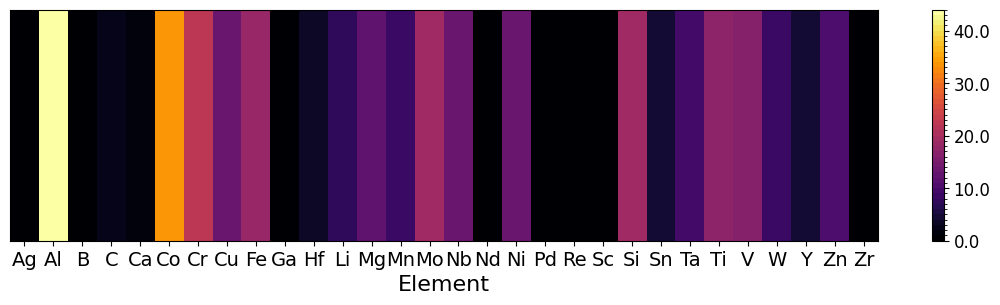

In [43]:
# Plot heatmap for PAL recommendations
save_path = "pal_recs_heatmap.pdf"
cbar_labels = np.linspace(0, 40, 5)
elem_heatmap(elems, elem_counts, cbar_labels, save_path)

Manufactured Recommendations

In [44]:
# Load MPEA datasets
manu_alloys = pd.read_csv("/home/jren/pal_project/mpea_clustering/mpea_manufactured_recs.csv").iloc[:,1:31]

print(manu_alloys)
X = np.array(manu_alloys)

# Elements (colummn labels)
elems = list(manu_alloys.columns)
print(elems)

# Get element counts
manu_counts = get_elem_counts(manu_alloys, elems)
print(manu_counts)

    Ag  Al  B  C  Ca  Co  Cr  Cu  Fe  Ga  ...  Sc  Si  Sn  Ta  Ti  V  W  Y  \
0    0   1  0  0   0   1   1   0   1   0  ...   0   1   0   0   0  0  0  0   
1    0   0  0  0   0   1   0   1   1   0  ...   0   0   0   0   0  0  0  0   
2    0   0  0  0   0   0   0   0   1   0  ...   0   1   0   0   0  0  0  0   
3    0   1  0  0   0   0   0   0   1   0  ...   0   0   0   0   0  0  0  0   
4    0   0  0  0   0   1   0   0   0   0  ...   0   1   0   1   0  0  0  0   
5    0   0  0  0   0   1   0   0   1   0  ...   0   1   0   0   0  0  0  0   
6    0   0  0  0   0   1   0   0   0   0  ...   0   1   0   1   0  0  0  0   
7    0   1  0  0   0   0   0   0   0   0  ...   0   0   0   0   0  0  0  0   
8    0   0  0  0   0   1   0   0   1   0  ...   0   1   0   0   1  0  1  0   
9    0   1  0  0   0   1   0   0   1   0  ...   0   1   0   1   0  0  0  0   
10   0   1  0  0   0   1   0   0   0   0  ...   0   0   0   0   0  1  0  0   
11   0   1  0  0   0   0   1   0   0   0  ...   0   0   0   0   

/tmp/ipykernel_10370/1443622778.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=cbar_labels)


Saved plot to 'manufactured_recs_heatmap.pdf'


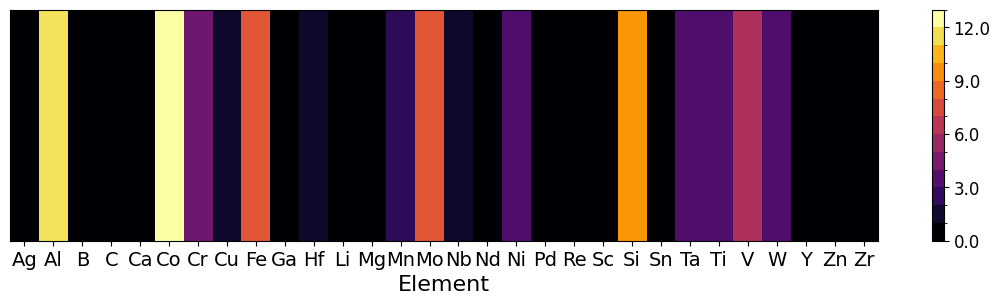

In [45]:
# Plot heatmap for manufactured recommendations
save_path = "manufactured_recs_heatmap.pdf"
cbar_labels = np.linspace(0, 12, 5)
elem_heatmap(elems, manu_counts, cbar_labels, save_path)